In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pycaret

## Data Preparation

In [2]:
# Read in data and display first 5 rows
fn='../Data/INTERP_BGU.csv'
features = pd.read_csv(fn)
features.head()

,utvec,dv,err,temp,SM_EWT,date
0,2007.089722,-0.1144,0.1078,-1.94899,0.464541,2007-02-03
1,2007.092407,-0.1211,0.1080,-1.92494,0.464670,2007-02-04
2,2007.095093,-0.1260,0.1080,-1.82530,0.464805,2007-02-05
3,2007.097900,-0.1276,0.1075,-1.57670,0.464934,2007-02-06
4,2007.100586,-0.1357,0.1084,-1.36909,0.465069,2007-02-07


In [3]:
data_day=features.utvec
data_date=features.date
features=features.drop(columns=['utvec','date','err'])
features.head()

,dv,temp,SM_EWT
0,-0.1144,-1.94899,0.464541
1,-0.1211,-1.92494,0.464670
2,-0.1260,-1.82530,0.464805
3,-0.1276,-1.57670,0.464934
4,-0.1357,-1.36909,0.465069


In [4]:
# Descriptive statistics for each column
features.describe()

,dv,temp,SM_EWT
count,5675.000000,5675.000000,5675.000000
mean,0.004079,10.225376,0.460619
std,0.205298,8.896228,0.025127
min,-0.423000,-5.268270,0.415005
25%,-0.152600,2.133070,0.446141
50%,0.000799,9.196760,0.456210
75%,0.155100,18.705700,0.470845
max,0.472300,25.834000,0.546989


In [5]:
features.temp=features.temp-np.mean(features.temp)
features.SM_EWT=features.SM_EWT-np.mean(features.SM_EWT)

In [6]:
features.dv=features.dv/np.max(np.abs(features.dv))
features.temp=features.temp/np.max(np.abs(features.temp))
features.SM_EWT=features.SM_EWT/np.max(np.abs(features.SM_EWT))

In [7]:
train_ratio=0.1
total_num=len(features)
train_set= int(train_ratio*total_num) 
test_set= total_num - train_set

In [8]:

train_df = features[ :train_set]
test_df = features[train_set: ]
print('Data for Modeling: ' + str(train_df.shape))
print('Unseen Data For Predictions: ' + str(test_df.shape))

Data for Modeling: (567, 3)
Unseen Data For Predictions: (5108, 3)


In [9]:
#!pip install Scikit-learn==1.1
#!pip install scikit-plot

In [10]:
from pycaret.regression import *
exp_reg101 = setup(data = train_df, 
                   target = 'SM_EWT',
                   #mputation_type='iterative', 
                   fold_shuffle=True, 
                   session_id=123)

,Description,Value
0,session_id,123
1,Target,SM_EWT
2,Original Data,"(567, 3)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(396, 2)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

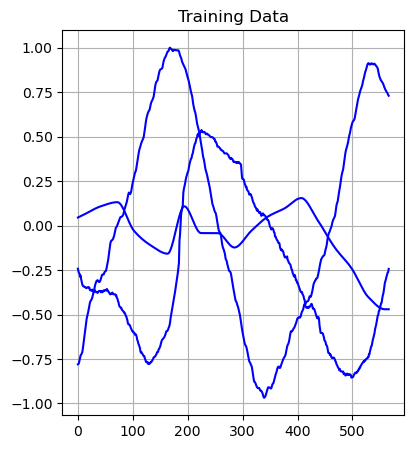

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.plot(train_df, 'b-')
#plt.plot(np.arange(train_set), train_set, 'r*')
plt.title("Training Data")
plt.grid(True)
#plt.subplot(1,3,2)
#plt.plot(x_val, 'b-')
#plt.title("Validation Data")
#plt.grid(True)
#plt.subplot(1,3,3)
#plt.plot(test_df, 'b-')
#plt.title("Test Data")

plt.grid(True)